## Imports and functions

In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import utils 
import Pass
import numpy as np
import glob
from Scratch import Scratch
from scipy.interpolate import interp1d
import statistics as stats
import math
from matplotlib.ticker import MultipleLocator

FS = (12,6)

## Read and display data for series 200 (GRIND)

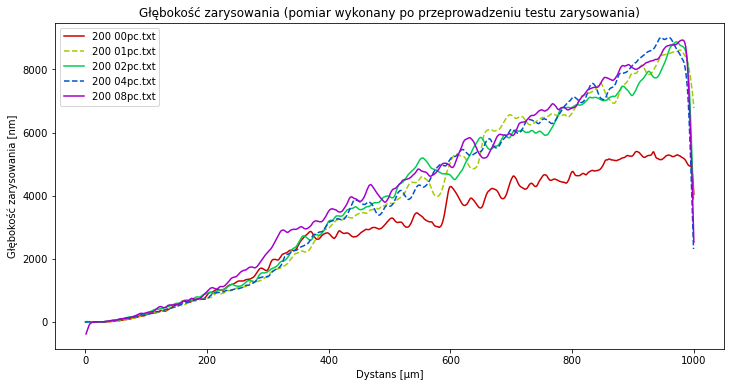

In [2]:
fileList = sorted(glob.glob('data/scratch/wyniki/szlifowane/200*.txt'))
sampleList = [utils.read_data(file) for file in fileList]
utils.preprocess_samples(sampleList)

fig = pyplot.figure(figsize=FS)
ax = fig.add_subplot(111)
utils.plot_scratch_samples(ax, sampleList, fileList)  


## Read and display data for sieries R7200 (GRIND)

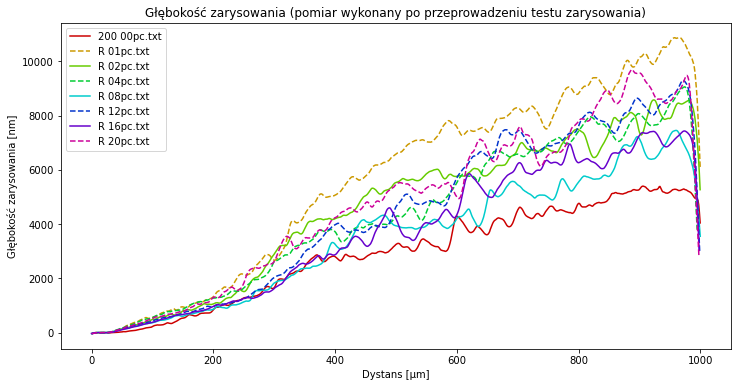

In [3]:
fileList = glob.glob('data/scratch/wyniki/szlifowane/200 00pc.txt')+sorted(glob.glob('data/scratch/wyniki/szlifowane/R*.txt'))
sampleList = [utils.read_data(file) for file in fileList]
utils.preprocess_samples(sampleList)

fig = pyplot.figure(figsize=FS)
ax = fig.add_subplot(111)

utils.plot_scratch_samples(ax, sampleList, fileList)  

# 2. SURFACE

## Read data (SURFACE)

In [4]:
fileList = sorted(glob.glob('data/scratch/wyniki/powierzchnia/200*.txt'))
sampleList = [utils.read_data(file) for file in fileList]
sampleNames = ['Ref', 'A 1%', 'A 2%', 'A 4%', 'A 8%']
utils.preprocess_samples(sampleList)

fileListR = glob.glob('data/scratch/wyniki/powierzchnia/200_00pc.txt') \
    +sorted(glob.glob('data/scratch/wyniki/powierzchnia/R7200*.txt')) \
#   +sorted(glob.glob('data/scratch/wyniki/powierzchnia/200*.txt'))
del fileListR[1] # Remove reference from hydrophobic run
sampleListR = [utils.read_data(file) for file in fileListR]
sampleNamesR = ['Ref', 'R 1%', 'R 2%', 'R 4%', 'R 8%', 'R 12%', 'R 16%', 'R 20%']
to_remove_r = [
    [0],
    [0, 5],
    [0, 5],
    [0, 2, 5],
    [0, 8],
    [0, 2],
    [0, 4],
    [0, 6]
]
for samp_no, samp_rem in enumerate(to_remove_r):
    samp_rem.reverse()
    for scratch_no in samp_rem:
        del sampleListR[samp_no][scratch_no]
utils.preprocess_samples(sampleListR)

# fig = pyplot.figure(figsize=(20,10))
# ax = fig.add_subplot(111)

# utils.plot_scratch_samples(ax, sampleList, fileList, truncate=-1) 
# #ax.set_yscale('log')
# #ax.set_xscale('log')

## Read and display mean data for sieries R7200 (SURFACE)

(0.0, 500.0)

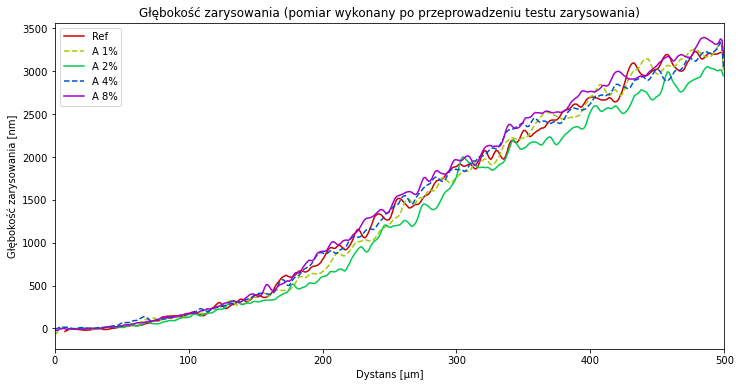

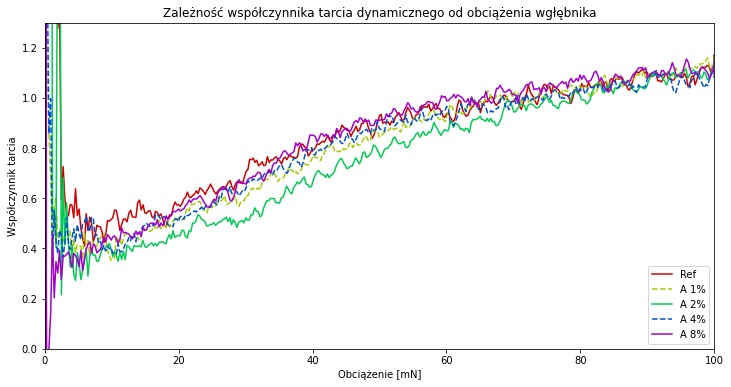

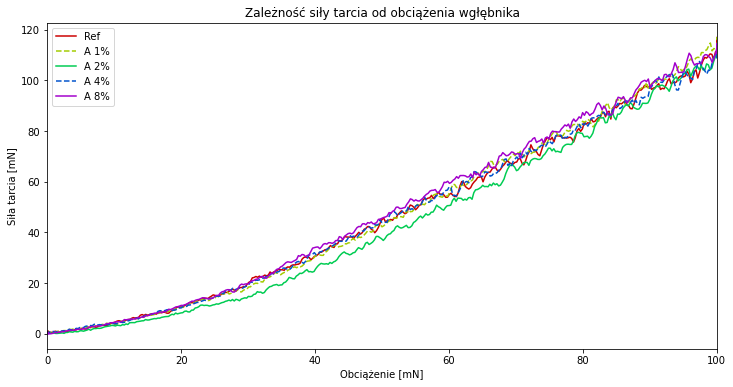

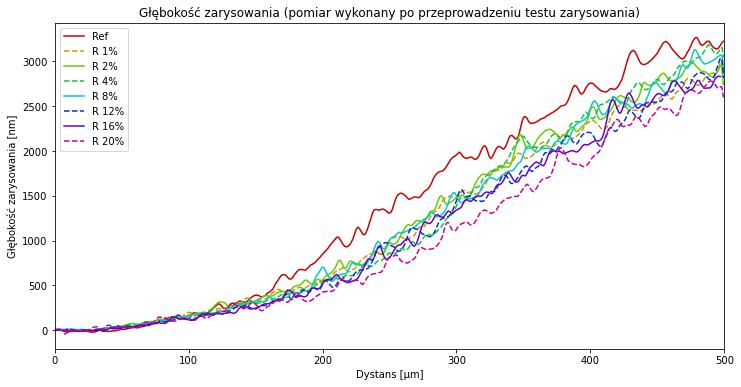

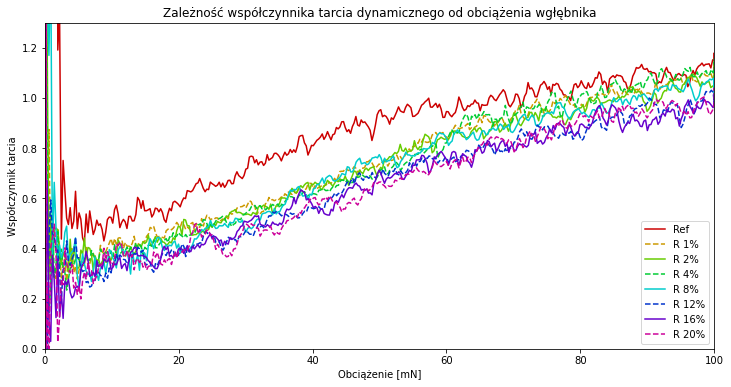

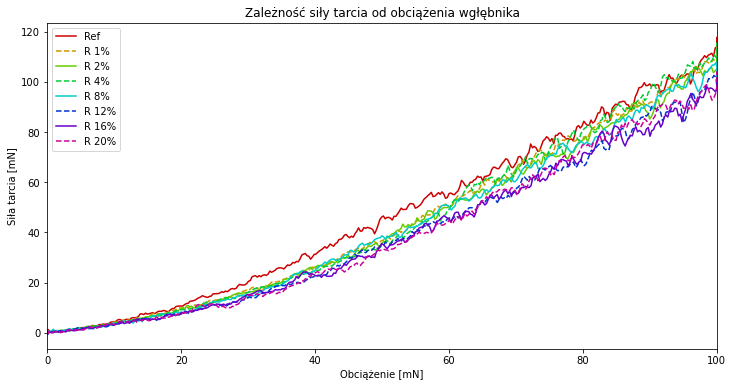

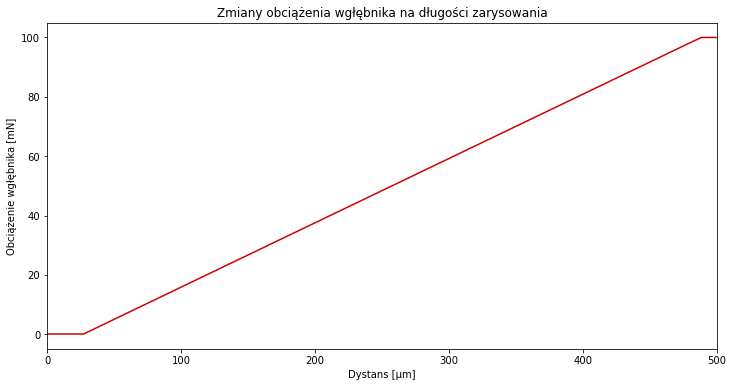

In [5]:
for sl, sn in ((sampleList, sampleNames), (sampleListR, sampleNamesR)):
    fig = pyplot.figure(figsize=FS)
    ax = fig.add_subplot(111)
    utils.plot_scratch_samples(ax, sl, sn, toPlot='d') 
    ax.set_xlim((0, 500))

    fig = pyplot.figure(figsize=FS)
    ax = fig.add_subplot(111)
    utils.plot_scratch_samples(ax, sl, sn, toPlot='fc', base='load', legend='lower right')
    ax.set_ylim([0, 1.3])
    ax.set_xlim((0, 100))

    fig = pyplot.figure(figsize=FS)
    ax = fig.add_subplot(111)
    utils.plot_scratch_samples(ax, sl, sn, toPlot='f', base='load')
    ax.set_xlim((0, 100))

fig = pyplot.figure(figsize=FS)
ax = fig.add_subplot(111)
utils.plot_scratch_samples(ax, [sampleListR[1]], sampleNamesR, toPlot='l', legend=None)
ax.set_xlim([0, 500])

    # fig = pyplot.figure(figsize=FS)
    # ax = fig.add_subplot(111)
    # utils.plot_scratch_samples(ax, sampleListR, sampleNamesR, toPlot='tf')

    # fig = pyplot.figure(figsize=FS)
    # ax = fig.add_subplot(111)
    # utils.plot_scratch_samples(ax, sampleListR, sampleNamesR, toPlot='ae')

## Coefficient of friction at low load


[{'mean': 0.5468975720127744, 'std_error': 0.031389895972935566}, {'mean': 0.4651803121611392, 'std_error': 0.020998122724161065}, {'mean': 0.42771368474709054, 'std_error': 0.03200115617970499}, {'mean': 0.4687781997598212, 'std_error': 0.03310088565717944}, {'mean': 0.4841371072347879, 'std_error': 0.02246443343235378}]
[{'mean': 0.5547956600395709, 'std_error': 0.02957307958336986}, {'mean': 0.44524308580239946, 'std_error': 0.04220767324699555}, {'mean': 0.41494667262289886, 'std_error': 0.01849113808735049}, {'mean': 0.4117096667219771, 'std_error': 0.029441973977993353}, {'mean': 0.39065713680313496, 'std_error': 0.02306699192050132}, {'mean': 0.3628580296634133, 'std_error': 0.03478953915578078}, {'mean': 0.3610128257065488, 'std_error': 0.04201788503650071}, {'mean': 0.36018653445907367, 'std_error': 0.03478355595825389}]


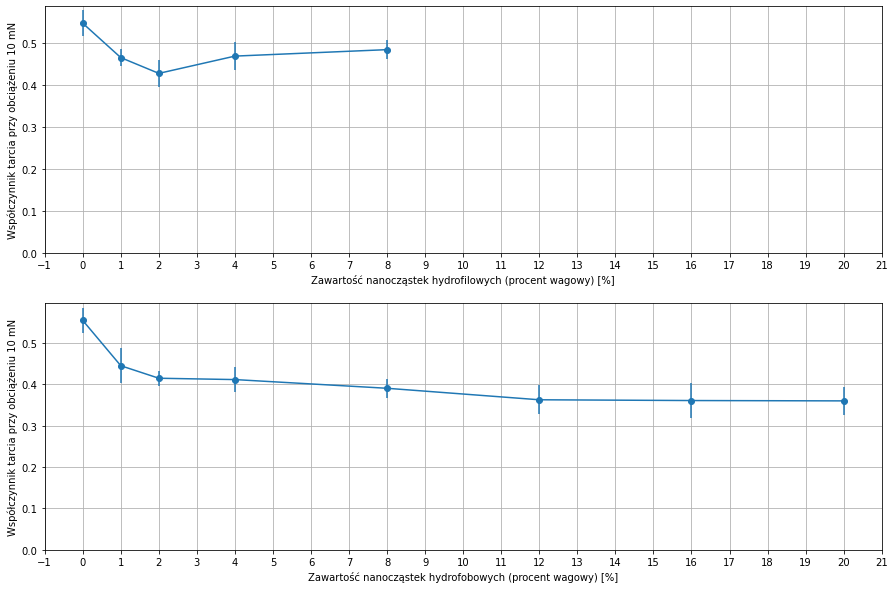

In [6]:
LOW_LOAD = (10, 20)
sqr3 = math.sqrt(3)

def get_sample_numbers_for_measurement(scratch, measurment_type, measurment_range):
    measurement = getattr(scratch, measurment_type)
    start_index = np.argmax(measurement > measurment_range[0])
    stop_index = np.argmax(measurement > measurment_range[1])
    return (start_index, stop_index)

def get_sample_fric_coeff_stats(sample):
    sample_coeffs = []
    for scratch in sample:
        sample_range = get_sample_numbers_for_measurement(
            scratch.scratch, "load", LOW_LOAD)
        coeff_subset = \
            scratch.scratch.fricCoeff[sample_range[0]:sample_range[1]]
        mean_coeff = np.mean(coeff_subset)
        sample_coeffs.append(mean_coeff)
    mean = np.mean(sample_coeffs)
    std_error = stats.stdev(sample_coeffs) / sqr3
    return {"mean": mean, "std_error": std_error}

sample_stats_list = []
for sample in sampleList:
    sample_stats_list.append(get_sample_fric_coeff_stats(sample))

sampleR_stats_list = []
for sample in sampleListR:
    sampleR_stats_list.append(get_sample_fric_coeff_stats(sample))

fig_coeff = pyplot.figure(figsize=(15,10))
ax4 = fig_coeff.add_subplot(211)
ax5 = fig_coeff.add_subplot(212)
#x = range(len(sample_mean_wear_rates_from_max))
y = [d["mean"] for d in sample_stats_list]
yerr = [d["std_error"] for d in sample_stats_list]
x = [0, 1, 2, 4, 8, 1, 2, 4, 8, 12, 16, 20]
ax4.errorbar(x[0:5], y, yerr=yerr, fmt = '-o')
y = [d["mean"] for d in sampleR_stats_list]
yerr = [d["std_error"] for d in sampleR_stats_list]
ax5.errorbar([x[0]]+x[5:], y, yerr=yerr, fmt = '-o')
ax4.set_ylim(0)
ax4.set_xlabel("Zawartość nanocząstek hydrofilowych (procent wagowy) [%]")
ax4.set_ylabel("Współczynnik tarcia przy obciążeniu 10 mN")
ax4.set_xlim(-1,21)
spacing = 1
ml = MultipleLocator(spacing)
ax4.xaxis.set_major_locator(ml)
ax4.grid()
ax5.set_ylim(0)
ax5.set_xlabel("Zawartość nanocząstek hydrofobowych (procent wagowy) [%]")
ax5.set_ylabel("Współczynnik tarcia przy obciążeniu 10 mN")
ax5.xaxis.set_major_locator(ml)
ax5.grid()
print('')

print(sample_stats_list)
print(sampleR_stats_list)
## Coefficient of friction at low and high load


## Coefficient of friction at high load


[{'mean': 1.0724317058609778, 'std_error': 0.027887111650038293}, {'mean': 1.0619619660352928, 'std_error': 0.009479250291919114}, {'mean': 1.0506667863422599, 'std_error': 0.037611969713505444}, {'mean': 1.0438204854401232, 'std_error': 0.010000250463961502}, {'mean': 1.0789616674942344, 'std_error': 0.01201372719327387}]
[{'mean': 1.0843784662137275, 'std_error': 0.018430499443362506}, {'mean': 1.0137822295576089, 'std_error': 0.035316197427616686}, {'mean': 0.9972743771592374, 'std_error': 0.01169602286779274}, {'mean': 1.0305877975991102, 'std_error': 0.03427471253389066}, {'mean': 0.9737602370323312, 'std_error': 0.022911388237350967}, {'mean': 0.9167984853819493, 'std_error': 0.013010095260054193}, {'mean': 0.9135737175061976, 'std_error': 0.014596850141956094}, {'mean': 0.9378133319165406, 'std_error': 0.027043996130450058}]


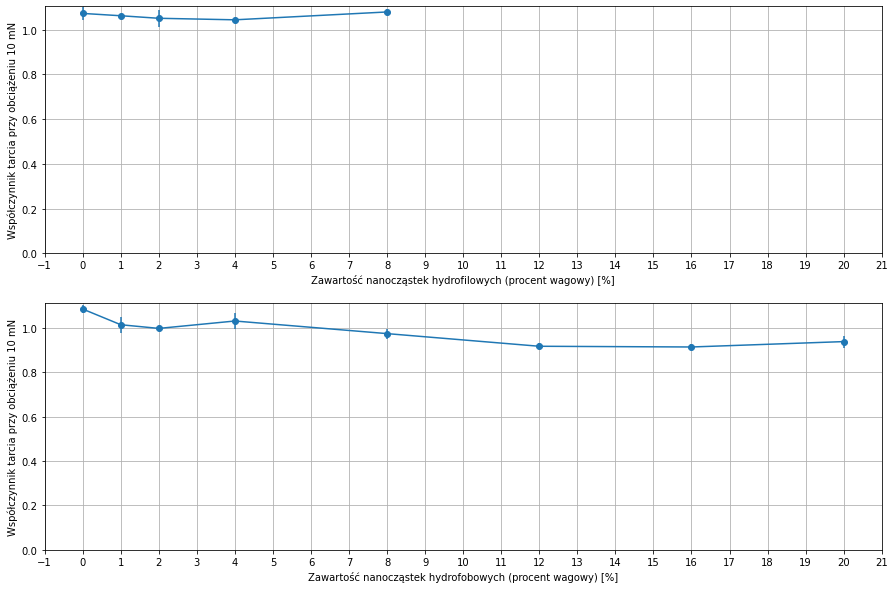

In [8]:
HIGH_LOAD = (80, 90)
sqr3 = math.sqrt(3)

def get_sample_numbers_for_measurement(scratch, measurment_type, measurment_range):
    measurement = getattr(scratch, measurment_type)
    start_index = np.argmax(measurement > measurment_range[0])
    stop_index = np.argmax(measurement > measurment_range[1])
    return (start_index, stop_index)

def get_sample_fric_coeff_stats(sample):
    sample_coeffs = []
    for scratch in sample:
        sample_range = get_sample_numbers_for_measurement(
            scratch.scratch, "load", HIGH_LOAD)
        coeff_subset = \
            scratch.scratch.fricCoeff[sample_range[0]:sample_range[1]]
        mean_coeff = np.mean(coeff_subset)
        sample_coeffs.append(mean_coeff)
    mean = np.mean(sample_coeffs)
    std_error = stats.stdev(sample_coeffs) / sqr3
    return {"mean": mean, "std_error": std_error}

sample_stats_list = []
for sample in sampleList:
    sample_stats_list.append(get_sample_fric_coeff_stats(sample))

sampleR_stats_list = []
for sample in sampleListR:
    sampleR_stats_list.append(get_sample_fric_coeff_stats(sample))

fig_coeff = pyplot.figure(figsize=(15,10))
ax4 = fig_coeff.add_subplot(211)
ax5 = fig_coeff.add_subplot(212)
#x = range(len(sample_mean_wear_rates_from_max))
y = [d["mean"] for d in sample_stats_list]
yerr = [d["std_error"] for d in sample_stats_list]
x = [0, 1, 2, 4, 8, 1, 2, 4, 8, 12, 16, 20]
ax4.errorbar(x[0:5], y, yerr=yerr, fmt = '-o')
y = [d["mean"] for d in sampleR_stats_list]
yerr = [d["std_error"] for d in sampleR_stats_list]
ax5.errorbar([x[0]]+x[5:], y, yerr=yerr, fmt = '-o')
ax4.set_ylim(0)
ax4.set_xlabel("Zawartość nanocząstek hydrofilowych (procent wagowy) [%]")
ax4.set_ylabel("Współczynnik tarcia przy obciążeniu 10 mN")
ax4.set_xlim(-1,21)
spacing = 1
ml = MultipleLocator(spacing)
ax4.xaxis.set_major_locator(ml)
ax4.grid()
ax5.set_ylim(0)
ax5.set_xlabel("Zawartość nanocząstek hydrofobowych (procent wagowy) [%]")
ax5.set_ylabel("Współczynnik tarcia przy obciążeniu 10 mN")
ax5.xaxis.set_major_locator(ml)
ax5.grid()
print('')

print(sample_stats_list)
print(sampleR_stats_list)

## Final scratch depth (after 3rd pass)

In [ ]:
LOAD_RANGE = (80, 100)
sqr3 = math.sqrt(3)

def get_sample_scratch_depth_stats(sample):
    sample_coeffs = []
    for scratch in sample:
        sample_range = get_sample_numbers_for_measurement(
            scratch.scratch, "load", LOW_LOAD)
        coeff_subset = \
            scratch.topo2.depth[sample_range[0]:sample_range[1]]
        mean_coeff = np.mean(coeff_subset)
        sample_coeffs.append(mean_coeff)
    mean = np.mean(sample_coeffs)
    std_error = stats.stdev(sample_coeffs) / sqr3
    return {"mean": mean, "std_error": std_error}

sample_stats_list = []
for sample in sampleList:
    sample_stats_list.append(get_sample_scratch_depth_stats(sample))

sampleR_stats_list = []
for sample in sampleListR:
    sampleR_stats_list.append(get_sample_scratch_depth_stats(sample))

fig_depth = pyplot.figure(figsize=(15,10))
ax4 = fig_depth.add_subplot(211)
ax5 = fig_depth.add_subplot(212)
#x = range(len(sample_mean_wear_rates_from_max))
y = [d["mean"] for d in sample_stats_list]
yerr = [d["std_error"] for d in sample_stats_list]
x = [0, 1, 2, 4, 8, 1, 2, 4, 8, 12, 16, 20]
ax4.errorbar(x[0:5], y, yerr=yerr, fmt = '-o')
y = [d["mean"] for d in sampleR_stats_list]
yerr = [d["std_error"] for d in sampleR_stats_list]
ax5.errorbar([x[0]]+x[5:], y, yerr=yerr, fmt = '-o')
ax4.set_ylim(0)
ax4.set_xlabel("Zawartość nanocząstek hydrofilowych (procent wagowy) [%]")
ax4.set_ylabel("Końcowa głębokość zarysowania")
ax4.set_xlim(-1,21)
spacing = 1
ml = MultipleLocator(spacing)
ax4.xaxis.set_major_locator(ml)
ax4.grid()
ax5.set_ylim(0)
ax5.set_xlabel("Zawartość nanocząstek hydrofobowych (procent wagowy) [%]")
ax5.set_ylabel("Końcowa głębokość zarysowania")
ax5.xaxis.set_major_locator(ml)
ax5.grid()
print('')

print(sample_stats_list)
print(sampleR_stats_list)


## Penetration rate estimatio

In [ ]:
fig = pyplot.figure(figsize=(20,10))
ax = fig.add_subplot(111)

colors = ['k', 'k', 'k', 'b', 'g', 'r', 'c', 'm', 'y']
len(sampleList)

for idx, sample in enumerate(sampleListR):
    for scratch in sample:
        ax.plot(scratch.topo2.distance, scratch.topo2.depth, color=colors[idx])


# Single

In [ ]:
for idx, sample in enumerate(sampleList):
    fig = pyplot.figure(figsize=(12,7))
    ax = fig.add_subplot(211)
    utils.plot_scratch_sample(ax, [sample[1]], sampleNamesR[idx], toPlot='d')
    ax = fig.add_subplot(212)
    utils.plot_scratch_sample(ax, [sample[0]], sampleNamesR[idx], toPlot='f')
    pyplot.tight_layout()
